In [165]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import requests
from bs4 import BeautifulSoup
import matplotlib.dates as mdates

plt.style.use('ggplot')

## Data loading

In [146]:
ticker = 'EQNR'

news = yf.Ticker(ticker).news

news_dict = {}

for article in news:
    timestamp = article['providerPublishTime']
    datetime = dt.datetime.fromtimestamp(timestamp)

    

    news_dict[datetime] = [
        article['title'], 
        article['link']
    ]

df = pd.DataFrame(news_dict, index=['Title', 'Link']).T

display(df)

,Title,Link
2023-10-24 10:22:00,Correction: Equinor ASA: Share buy-back,https://finance.yahoo.com/news/correction-equi...
2023-10-24 08:00:00,Equinor ASA: Share buy-back,https://finance.yahoo.com/news/equinor-asa-sha...
2023-10-23 11:08:23,16 Best Places to Retire in Norway,https://finance.yahoo.com/news/16-best-places-...
2023-10-20 14:35:00,Equinor (EQNR) Commences Breidablikk Field Pro...,https://finance.yahoo.com/news/equinor-eqnr-co...
2023-10-19 20:11:24,Offshore wind developers likely to cancel some...,https://finance.yahoo.com/news/offshore-wind-d...
2023-10-19 12:48:00,Equinor ASA: Buy-back of shares to share progr...,https://finance.yahoo.com/news/equinor-asa-buy...
2023-10-18 16:56:26,UPDATE 1-Equinor chief sees EU gas market in '...,https://finance.yahoo.com/news/1-equinor-chief...
2023-10-13 09:53:37,Major gas supplier Norway closely monitoring B...,https://finance.yahoo.com/news/major-gas-suppl...


In [147]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [148]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Title']
    myid = i
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/8 [00:00<?, ?it/s]

In [149]:
vaders = pd.DataFrame(res).T

vaders

result_df = pd.concat([df, vaders], axis=1)

display(result_df) 

# vaders = vaders.merge(df, how='left')


,Title,Link,neg,neu,pos,compound
2023-10-24 10:22:00,Correction: Equinor ASA: Share buy-back,https://finance.yahoo.com/news/correction-equi...,0.000,0.645,0.355,0.2960
2023-10-24 08:00:00,Equinor ASA: Share buy-back,https://finance.yahoo.com/news/equinor-asa-sha...,0.000,0.577,0.423,0.2960
2023-10-23 11:08:23,16 Best Places to Retire in Norway,https://finance.yahoo.com/news/16-best-places-...,0.000,0.588,0.412,0.6369
2023-10-20 14:35:00,Equinor (EQNR) Commences Breidablikk Field Pro...,https://finance.yahoo.com/news/equinor-eqnr-co...,0.000,1.000,0.000,0.0000
2023-10-19 20:11:24,Offshore wind developers likely to cancel some...,https://finance.yahoo.com/news/offshore-wind-d...,0.167,0.833,0.000,-0.2500
2023-10-19 12:48:00,Equinor ASA: Buy-back of shares to share progr...,https://finance.yahoo.com/news/equinor-asa-buy...,0.000,0.645,0.355,0.5267
2023-10-18 16:56:26,UPDATE 1-Equinor chief sees EU gas market in '...,https://finance.yahoo.com/news/1-equinor-chief...,0.000,0.805,0.195,0.4404
2023-10-13 09:53:37,Major gas supplier Norway closely monitoring B...,https://finance.yahoo.com/news/major-gas-suppl...,0.000,1.000,0.000,0.0000


# Compare with stock price

,Title,Link,neg,neu,pos,compound
2023-10-24 10:22:00,Correction: Equinor ASA: Share buy-back,https://finance.yahoo.com/news/correction-equi...,0.000,0.645,0.355,0.2960
2023-10-24 08:00:00,Equinor ASA: Share buy-back,https://finance.yahoo.com/news/equinor-asa-sha...,0.000,0.577,0.423,0.2960
2023-10-23 11:08:23,16 Best Places to Retire in Norway,https://finance.yahoo.com/news/16-best-places-...,0.000,0.588,0.412,0.6369
2023-10-20 14:35:00,Equinor (EQNR) Commences Breidablikk Field Pro...,https://finance.yahoo.com/news/equinor-eqnr-co...,0.000,1.000,0.000,0.0000
2023-10-19 20:11:24,Offshore wind developers likely to cancel some...,https://finance.yahoo.com/news/offshore-wind-d...,0.167,0.833,0.000,-0.2500
2023-10-19 12:48:00,Equinor ASA: Buy-back of shares to share progr...,https://finance.yahoo.com/news/equinor-asa-buy...,0.000,0.645,0.355,0.5267
2023-10-18 16:56:26,UPDATE 1-Equinor chief sees EU gas market in '...,https://finance.yahoo.com/news/1-equinor-chief...,0.000,0.805,0.195,0.4404
2023-10-13 09:53:37,Major gas supplier Norway closely monitoring B...,https://finance.yahoo.com/news/major-gas-suppl...,0.000,1.000,0.000,0.0000


C:\Users\joneh\AppData\Local\Temp\ipykernel_21592\835413715.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


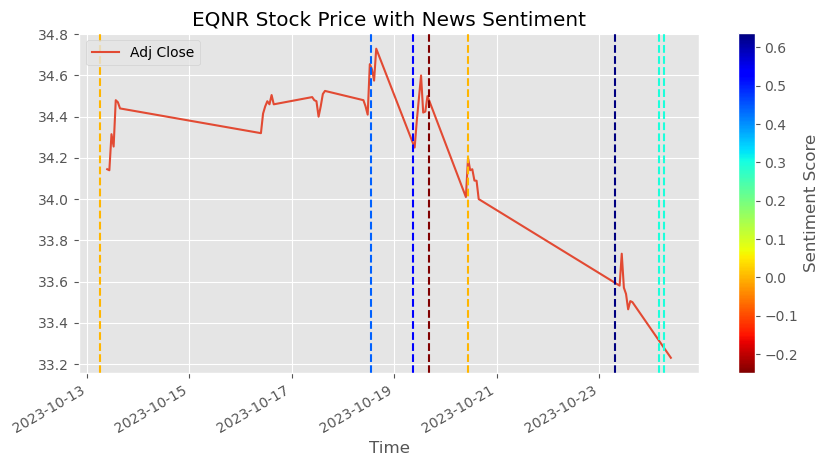

In [164]:

start = result_df.index.min()
end = result_df.index.max()

stock_data = yf.download(
    ticker, 
    start=start,
    end=end,
    interval='1h',
    progress=False
)[['Adj Close']]

cmap = plt.get_cmap('jet_r')
norm = plt.Normalize(result_df['compound'].min(), result_df['compound'].max()) 

display(result_df)
fig, ax = plt.subplots(figsize=(10, 5))

stock_data.plot(xlabel='Time', ax=ax)

for i, row in result_df.iterrows():
    color = cmap(norm(row['compound']))
    ax.axvline(x=i, color=color, linestyle='--')

ax.set_title(f'{ticker} Stock Price with News Sentiment')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Create an empty array for the colorbar
cbar = plt.colorbar(sm)
cbar.set_label('Sentiment Score')